In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV
sb.set() # set the default Seaborn style for graphics

In [2]:
pkmndata = pd.read_csv('pokemonData.csv')
pkmndata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
print("Data type : ", type(pkmndata))
print("Data dims : ", pkmndata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (800, 13)


In [4]:
print(pkmndata.dtypes)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


In [5]:
total = pd.DataFrame(pkmndata['Total'])  # Response
hp = pd.DataFrame(pkmndata['HP'])        # Predictor

In [6]:
# Train Set : 600 samples
hp_train = pd.DataFrame(hp[:600])
total_train = pd.DataFrame(total[:600])

# Test Set : 200 samples
hp_test = pd.DataFrame(hp[-200:])
total_test = pd.DataFrame(total[-200:])

# Check the sample sizes
print("Train Set :", hp_train.shape, total_train.shape)
print("Test Set  :", hp_test.shape, total_test.shape)

Train Set : (600, 1) (600, 1)
Test Set  : (200, 1) (200, 1)


In [7]:
# Summary Statistics for HP Train
hp_train.describe()

,HP
count,600.000000
mean,69.026667
std,26.611267
min,1.000000
25%,50.000000
50%,65.000000
75%,80.000000
max,255.000000


In [8]:
# Summary Statistics for Total Train
total_train.describe()

,Total
count,600.000000
mean,432.715000
std,122.365283
min,180.000000
25%,325.000000
50%,440.000000
75%,515.000000
max,780.000000


<AxesSubplot:>

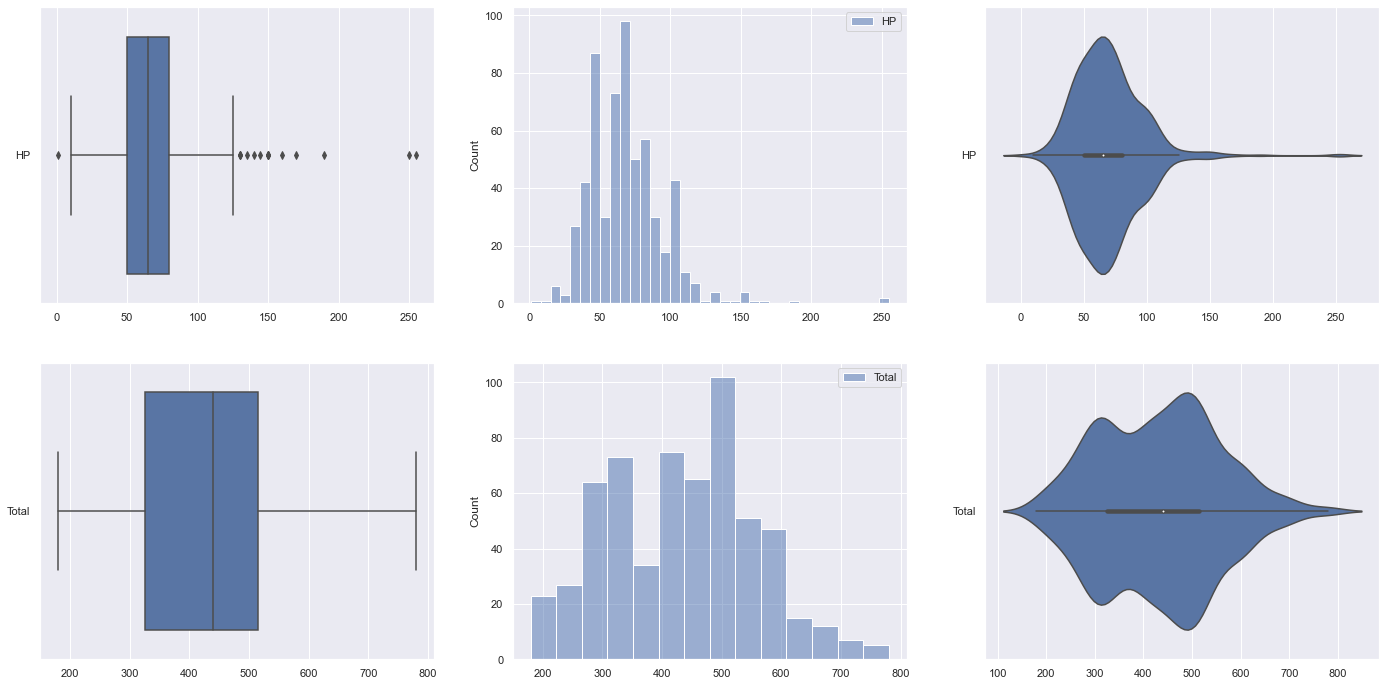

In [9]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP Train
sb.boxplot(data = hp_train, orient = "h", ax = axes[0,0])
sb.histplot(data = hp_train, ax = axes[0,1])
sb.violinplot(data = hp_train, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sb.boxplot(data = total_train, orient = "h", ax = axes[1,0])
sb.histplot(data = total_train, ax = axes[1,1])
sb.violinplot(data = total_train, orient = "h", ax = axes[1,2])

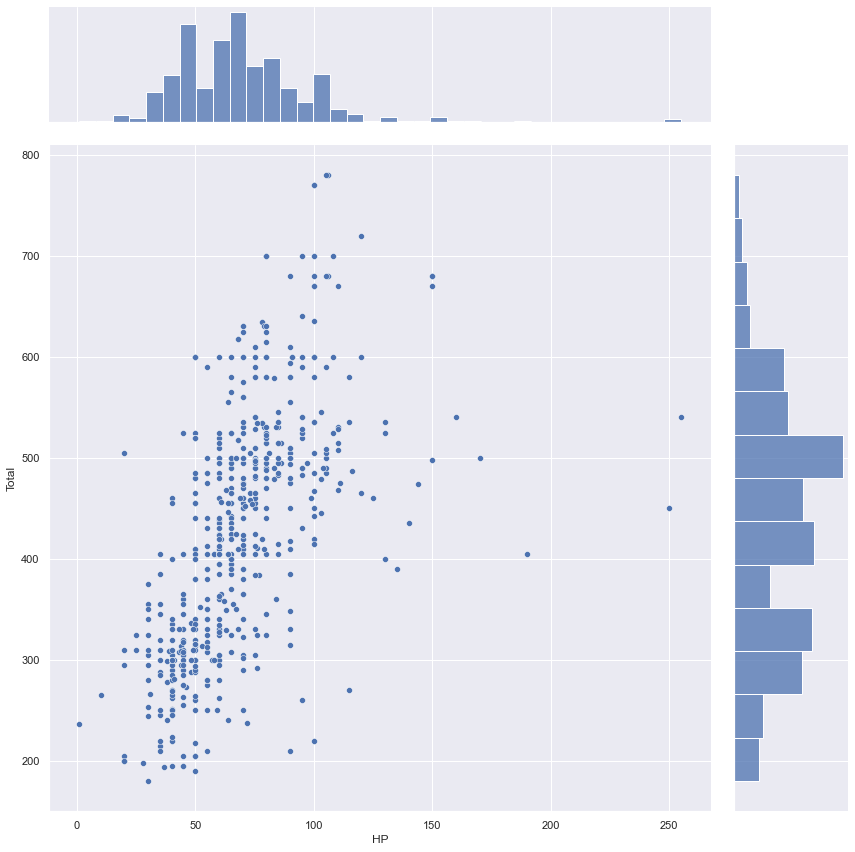

In [10]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([hp_train, total_train], axis = 1).reindex(hp_train.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = trainDF, x = "HP", y = "Total", height = 12)

<AxesSubplot:>

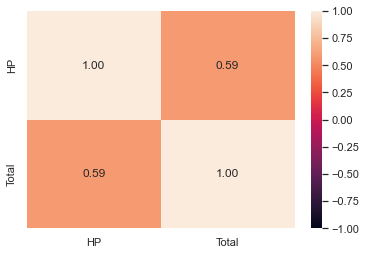

In [11]:
# Calculate the correlation between the two columns/variables
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [12]:
# Extract Response and Predictors
y = pd.DataFrame(pkmndata["Total"])
X = pd.DataFrame(pkmndata[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]])

pred_train, pred_test, tar_train, tar_test = train_test_split(X, y, 
                                                              test_size=.3, random_state=123)

In [13]:
# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

C:\Users\amosn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [15]:
# print variable names and regression coefficients
dict(zip(X.columns, model.coef_))


{'HP': 0.9999999999999998,
 'Attack': 1.0000000000000002,
 'Defense': 1.0000000000000007,
 'Sp. Atk': 0.9999999999999987,
 'Sp. Def': 1.0000000000000004,
 'Speed': 1.0000000000000002}

C:\Users\amosn\AppData\Local\Temp/ipykernel_2392/2177179818.py:2: RuntimeWarning: divide by zero encountered in log10
  m_log_alphas = -np.log10(model.alphas_)
C:\Users\amosn\AppData\Local\Temp/ipykernel_2392/2177179818.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',


Text(0.5, 1.0, 'Regression Coefficients Progression for Lasso Paths')

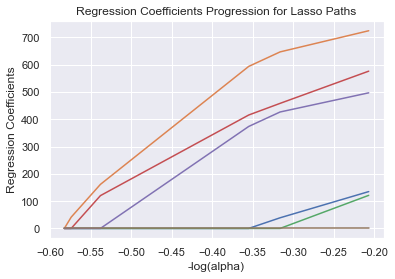

In [16]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

In [18]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
3.875966632829913e-27
test data MSE
5.4997278682928356e-27


In [19]:
# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
1.0
test data R-square
1.0
